In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv_10.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

10/05/2020 16:08:23 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 16:08:24 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 16:08:24 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 16:08:25 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 16:08:26 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

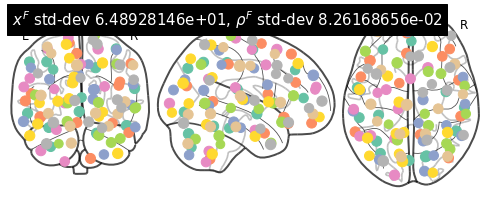

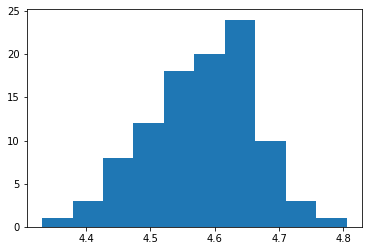

(<nilearn.plotting.displays.OrthoProjector at 0x7fbc0da6bc50>,
 tensor([[-33.0006, -32.0632, -23.1155],
         [ 37.8142,  -7.5260,  59.7364],
         [ 48.7236, -48.9156, -21.1424],
         [-35.1102, -59.4903,  46.0495],
         [-28.3802,  36.9428,  37.9015],
         [  1.4086,  45.8086,   8.5015],
         [ -1.0768, -79.7395,  -6.2330],
         [ 16.2733, -75.8788,  39.8128],
         [-53.3913, -34.6976,  45.9922],
         [ 57.2462, -23.9308,  17.8713],
         [-55.3264,  -3.2428,  -8.1399],
         [ 17.4044, -75.1471, -29.1813],
         [-30.9868, -72.1966, -43.3018],
         [ 33.9658,  29.7517, -18.3652],
         [-11.2609,   1.5864,  65.8283],
         [ -3.6064,  32.9751,  54.8188],
         [ 40.6111, -77.1435,  21.2544],
         [ 41.7811,  37.4958,  24.8974],
         [ 10.8443, -52.6485, -55.6517],
         [-57.6966, -49.6570,   4.8532],
         [ 51.1444,   4.7036, -28.4535],
         [-42.0806,  25.1958, -12.0711],
         [ 53.3428, -33.2323,  44.1

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

464

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

10/05/2020 16:09:29 [Epoch 1] (6080ms) Posterior free-energy 8.17404160e+09 = KL from prior 1.81764960e+07 - log-likelihood -8.15586304e+09
10/05/2020 16:09:29 Saving checkpoint...
10/05/2020 16:09:35 [Epoch 2] (6011ms) Posterior free-energy 7.96216627e+09 = KL from prior 9.98522000e+06 - log-likelihood -7.95218227e+09
10/05/2020 16:09:41 [Epoch 3] (5938ms) Posterior free-energy 7.81973658e+09 = KL from prior 7.79271150e+06 - log-likelihood -7.81194291e+09
10/05/2020 16:09:47 [Epoch 4] (5934ms) Posterior free-energy 7.71944653e+09 = KL from prior 6.16188850e+06 - log-likelihood -7.71328461e+09
10/05/2020 16:09:53 [Epoch 5] (5916ms) Posterior free-energy 7.64231475e+09 = KL from prior 4.74565100e+06 - log-likelihood -7.63756800e+09
10/05/2020 16:09:59 [Epoch 6] (5946ms) Posterior free-energy 7.58484122e+09 = KL from prior 3.59116275e+06 - log-likelihood -7.58124954e+09
10/05/2020 16:10:05 [Epoch 7] (5934ms) Posterior free-energy 7.54103962e+09 = KL from prior 2.70046075e+06 - log-likeli

Epoch   470: reducing learning rate of group 0 to 5.0000e-03.
Epoch   470: reducing learning rate of group 1 to 5.0000e-04.
Epoch   470: reducing learning rate of group 2 to 5.0000e-03.
Epoch   470: reducing learning rate of group 3 to 5.0000e-04.


10/05/2020 16:56:02 [Epoch 471] (5890ms) Posterior free-energy 5.23797914e+09 = KL from prior 1.76234162e+06 - log-likelihood -5.23621683e+09
10/05/2020 16:56:08 [Epoch 472] (5868ms) Posterior free-energy 5.20533658e+09 = KL from prior 1.76034350e+06 - log-likelihood -5.20357581e+09
10/05/2020 16:56:13 [Epoch 473] (5850ms) Posterior free-energy 5.20391219e+09 = KL from prior 1.75921888e+06 - log-likelihood -5.20215194e+09
10/05/2020 16:56:19 [Epoch 474] (5820ms) Posterior free-energy 5.20346573e+09 = KL from prior 1.75910650e+06 - log-likelihood -5.20170803e+09
10/05/2020 16:56:25 [Epoch 475] (5870ms) Posterior free-energy 5.20297626e+09 = KL from prior 1.76138075e+06 - log-likelihood -5.20121498e+09
10/05/2020 16:56:31 [Epoch 476] (5864ms) Posterior free-energy 5.20250010e+09 = KL from prior 1.76178288e+06 - log-likelihood -5.20073933e+09
10/05/2020 16:56:37 [Epoch 477] (5932ms) Posterior free-energy 5.20220109e+09 = KL from prior 1.75913275e+06 - log-likelihood -5.20044134e+09
10/05/

Epoch   701: reducing learning rate of group 0 to 2.5000e-03.
Epoch   701: reducing learning rate of group 1 to 2.5000e-04.
Epoch   701: reducing learning rate of group 2 to 2.5000e-03.
Epoch   701: reducing learning rate of group 3 to 2.5000e-04.


10/05/2020 17:19:00 [Epoch 702] (5891ms) Posterior free-energy 5.18313421e+09 = KL from prior 1.81302725e+06 - log-likelihood -5.18132070e+09
10/05/2020 17:19:06 [Epoch 703] (5850ms) Posterior free-energy 5.17944883e+09 = KL from prior 1.81326862e+06 - log-likelihood -5.17763584e+09
10/05/2020 17:19:12 [Epoch 704] (5855ms) Posterior free-energy 5.17916211e+09 = KL from prior 1.81485000e+06 - log-likelihood -5.17734707e+09
10/05/2020 17:19:18 [Epoch 705] (5885ms) Posterior free-energy 5.17893530e+09 = KL from prior 1.81704462e+06 - log-likelihood -5.17711821e+09
10/05/2020 17:19:23 [Epoch 706] (5894ms) Posterior free-energy 5.17882266e+09 = KL from prior 1.81262425e+06 - log-likelihood -5.17700966e+09
10/05/2020 17:19:29 [Epoch 707] (5834ms) Posterior free-energy 5.17886362e+09 = KL from prior 1.81343550e+06 - log-likelihood -5.17705011e+09
10/05/2020 17:19:35 [Epoch 708] (5866ms) Posterior free-energy 5.17872794e+09 = KL from prior 1.81739362e+06 - log-likelihood -5.17691085e+09
10/05/

Epoch   869: reducing learning rate of group 0 to 1.2500e-03.
Epoch   869: reducing learning rate of group 1 to 1.2500e-04.
Epoch   869: reducing learning rate of group 2 to 1.2500e-03.
Epoch   869: reducing learning rate of group 3 to 1.2500e-04.


10/05/2020 17:35:38 [Epoch 870] (6067ms) Posterior free-energy 5.17381786e+09 = KL from prior 1.82989850e+06 - log-likelihood -5.17198746e+09
10/05/2020 17:35:44 [Epoch 871] (5987ms) Posterior free-energy 5.17358234e+09 = KL from prior 1.83093262e+06 - log-likelihood -5.17175194e+09
10/05/2020 17:35:50 [Epoch 872] (6020ms) Posterior free-energy 5.17353626e+09 = KL from prior 1.82771088e+06 - log-likelihood -5.17170893e+09
10/05/2020 17:35:56 [Epoch 873] (6002ms) Posterior free-energy 5.17346918e+09 = KL from prior 1.82990662e+06 - log-likelihood -5.17163981e+09
10/05/2020 17:36:02 [Epoch 874] (6046ms) Posterior free-energy 5.17342362e+09 = KL from prior 1.83154775e+06 - log-likelihood -5.17159219e+09
10/05/2020 17:36:08 [Epoch 875] (6006ms) Posterior free-energy 5.17341184e+09 = KL from prior 1.82857475e+06 - log-likelihood -5.17158298e+09
10/05/2020 17:36:14 [Epoch 876] (6006ms) Posterior free-energy 5.17327053e+09 = KL from prior 1.82996188e+06 - log-likelihood -5.17144064e+09
10/05/

Epoch   897: reducing learning rate of group 0 to 6.2500e-04.
Epoch   897: reducing learning rate of group 1 to 6.2500e-05.
Epoch   897: reducing learning rate of group 2 to 6.2500e-04.
Epoch   897: reducing learning rate of group 3 to 6.2500e-05.


10/05/2020 17:38:25 [Epoch 898] (5961ms) Posterior free-energy 5.17279181e+09 = KL from prior 1.82948250e+06 - log-likelihood -5.17096192e+09
10/05/2020 17:38:31 [Epoch 899] (6020ms) Posterior free-energy 5.17289626e+09 = KL from prior 1.82903238e+06 - log-likelihood -5.17106790e+09
10/05/2020 17:38:37 [Epoch 900] (6064ms) Posterior free-energy 5.17286605e+09 = KL from prior 1.82942338e+06 - log-likelihood -5.17103667e+09
10/05/2020 17:38:43 [Epoch 901] (5980ms) Posterior free-energy 5.17286093e+09 = KL from prior 1.82648600e+06 - log-likelihood -5.17103411e+09
10/05/2020 17:38:43 Saving checkpoint...
10/05/2020 17:38:49 [Epoch 902] (5912ms) Posterior free-energy 5.17273907e+09 = KL from prior 1.83263675e+06 - log-likelihood -5.17090765e+09
10/05/2020 17:38:55 [Epoch 903] (5931ms) Posterior free-energy 5.17284813e+09 = KL from prior 1.82685012e+06 - log-likelihood -5.17102182e+09
10/05/2020 17:39:01 [Epoch 904] (5914ms) Posterior free-energy 5.17281638e+09 = KL from prior 1.83074650e+0

Epoch   923: reducing learning rate of group 0 to 3.1250e-04.
Epoch   923: reducing learning rate of group 1 to 3.1250e-05.
Epoch   923: reducing learning rate of group 2 to 3.1250e-04.
Epoch   923: reducing learning rate of group 3 to 3.1250e-05.


10/05/2020 17:40:59 [Epoch 924] (5886ms) Posterior free-energy 5.17254042e+09 = KL from prior 1.82597200e+06 - log-likelihood -5.17071565e+09
10/05/2020 17:41:05 [Epoch 925] (5916ms) Posterior free-energy 5.17255782e+09 = KL from prior 1.83169875e+06 - log-likelihood -5.17072589e+09
10/05/2020 17:41:11 [Epoch 926] (5949ms) Posterior free-energy 5.17260544e+09 = KL from prior 1.83140662e+06 - log-likelihood -5.17077504e+09
10/05/2020 17:41:17 [Epoch 927] (5884ms) Posterior free-energy 5.17260237e+09 = KL from prior 1.82929075e+06 - log-likelihood -5.17077402e+09
10/05/2020 17:41:23 [Epoch 928] (5874ms) Posterior free-energy 5.17257011e+09 = KL from prior 1.83341988e+06 - log-likelihood -5.17073664e+09
10/05/2020 17:41:29 [Epoch 929] (5882ms) Posterior free-energy 5.17253274e+09 = KL from prior 1.83348325e+06 - log-likelihood -5.17069773e+09
10/05/2020 17:41:34 [Epoch 930] (5911ms) Posterior free-energy 5.17249382e+09 = KL from prior 1.83300512e+06 - log-likelihood -5.17066035e+09
10/05/

Epoch   944: reducing learning rate of group 0 to 1.5625e-04.
Epoch   944: reducing learning rate of group 1 to 1.5625e-05.
Epoch   944: reducing learning rate of group 2 to 1.5625e-04.
Epoch   944: reducing learning rate of group 3 to 1.5625e-05.


10/05/2020 17:43:03 [Epoch 945] (5925ms) Posterior free-energy 5.17246874e+09 = KL from prior 1.83067488e+06 - log-likelihood -5.17063731e+09
10/05/2020 17:43:09 [Epoch 946] (5914ms) Posterior free-energy 5.17247437e+09 = KL from prior 1.83240725e+06 - log-likelihood -5.17064346e+09
10/05/2020 17:43:15 [Epoch 947] (5907ms) Posterior free-energy 5.17238272e+09 = KL from prior 1.82808875e+06 - log-likelihood -5.17055488e+09
10/05/2020 17:43:21 [Epoch 948] (5928ms) Posterior free-energy 5.17232435e+09 = KL from prior 1.83154825e+06 - log-likelihood -5.17049344e+09
10/05/2020 17:43:27 [Epoch 949] (5900ms) Posterior free-energy 5.17234944e+09 = KL from prior 1.82963425e+06 - log-likelihood -5.17051904e+09
10/05/2020 17:43:33 [Epoch 950] (5918ms) Posterior free-energy 5.17235866e+09 = KL from prior 1.82955038e+06 - log-likelihood -5.17052877e+09
10/05/2020 17:43:39 [Epoch 951] (5901ms) Posterior free-energy 5.17234739e+09 = KL from prior 1.82808600e+06 - log-likelihood -5.17052058e+09
10/05/

Epoch   965: reducing learning rate of group 0 to 7.8125e-05.
Epoch   965: reducing learning rate of group 1 to 1.0000e-05.
Epoch   965: reducing learning rate of group 2 to 7.8125e-05.
Epoch   965: reducing learning rate of group 3 to 1.0000e-05.


10/05/2020 17:45:09 [Epoch 966] (5871ms) Posterior free-energy 5.17241754e+09 = KL from prior 1.82971475e+06 - log-likelihood -5.17058714e+09
10/05/2020 17:45:15 [Epoch 967] (5889ms) Posterior free-energy 5.17235968e+09 = KL from prior 1.82935238e+06 - log-likelihood -5.17053133e+09
10/05/2020 17:45:21 [Epoch 968] (5873ms) Posterior free-energy 5.17231258e+09 = KL from prior 1.82866975e+06 - log-likelihood -5.17048371e+09
10/05/2020 17:45:26 [Epoch 969] (5858ms) Posterior free-energy 5.17229414e+09 = KL from prior 1.83402150e+06 - log-likelihood -5.17045862e+09
10/05/2020 17:45:32 [Epoch 970] (5825ms) Posterior free-energy 5.17236070e+09 = KL from prior 1.83383075e+06 - log-likelihood -5.17052621e+09
10/05/2020 17:45:38 [Epoch 971] (5876ms) Posterior free-energy 5.17228134e+09 = KL from prior 1.83203650e+06 - log-likelihood -5.17044838e+09
10/05/2020 17:45:44 [Epoch 972] (5870ms) Posterior free-energy 5.17227110e+09 = KL from prior 1.83239512e+06 - log-likelihood -5.17043763e+09
10/05/

Epoch  1000: reducing learning rate of group 0 to 3.9063e-05.
Epoch  1000: reducing learning rate of group 2 to 3.9063e-05.


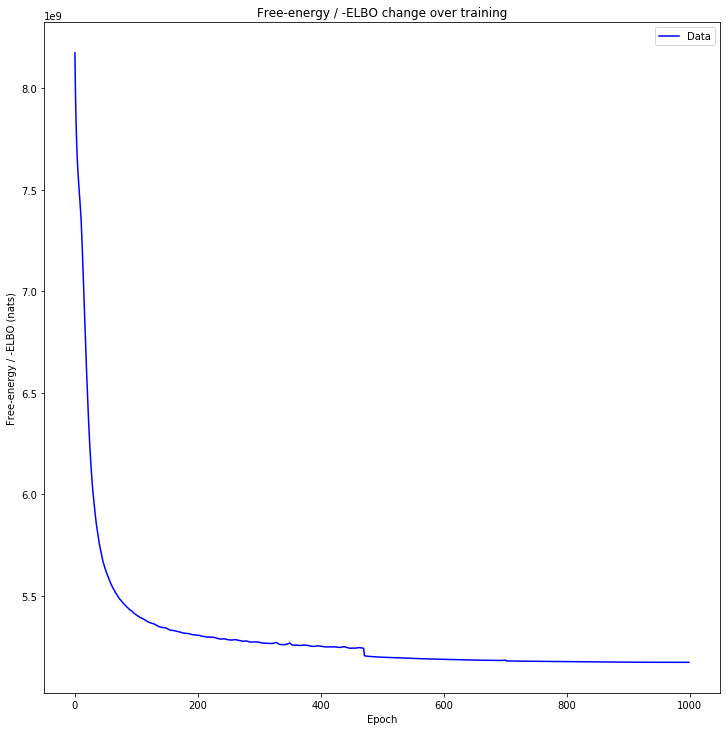

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

10/05/2020 17:48:30 [Epoch 1] (682ms) Posterior free-energy 1.26583398e+09 = KL from prior 1.06352211e+05 - log-likelihood -1.26572774e+09
10/05/2020 17:48:30 Saving checkpoint...
10/05/2020 17:48:31 [Epoch 2] (690ms) Posterior free-energy 1.21672461e+09 = KL from prior 1.03783641e+05 - log-likelihood -1.21662080e+09
10/05/2020 17:48:31 [Epoch 3] (689ms) Posterior free-energy 1.19689997e+09 = KL from prior 1.00430477e+05 - log-likelihood -1.19679949e+09
10/05/2020 17:48:32 [Epoch 4] (685ms) Posterior free-energy 1.18898637e+09 = KL from prior 9.97597734e+04 - log-likelihood -1.18888653e+09
10/05/2020 17:48:33 [Epoch 5] (685ms) Posterior free-energy 1.15395021e+09 = KL from prior 9.83497188e+04 - log-likelihood -1.15385178e+09
10/05/2020 17:48:33 [Epoch 6] (685ms) Posterior free-energy 1.13921613e+09 = KL from prior 9.71947969e+04 - log-likelihood -1.13911898e+09
10/05/2020 17:48:34 [Epoch 7] (681ms) Posterior free-energy 1.11096934e+09 = KL from prior 9.59160156e+04 - log-likelihood -1

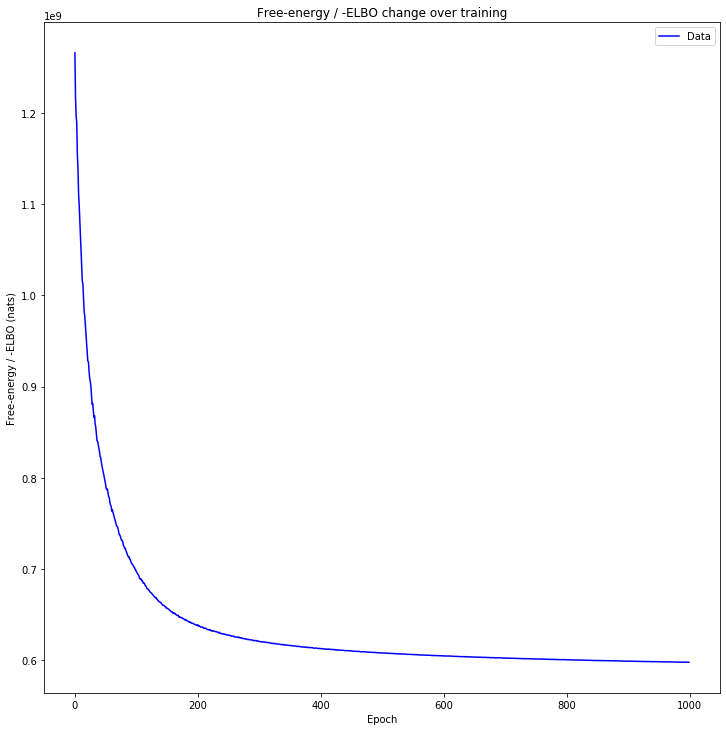

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

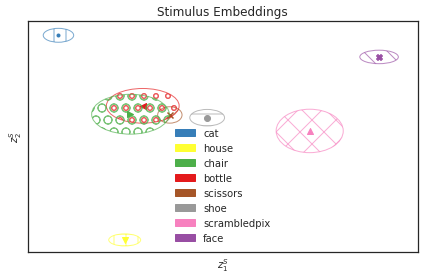

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

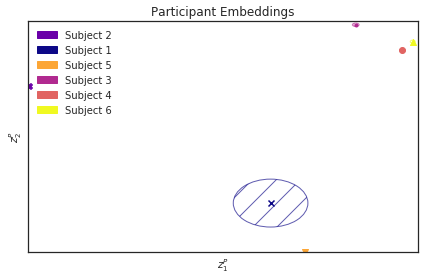

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

10/05/2020 18:00:00 Plotting factors for Participant 2, run 3


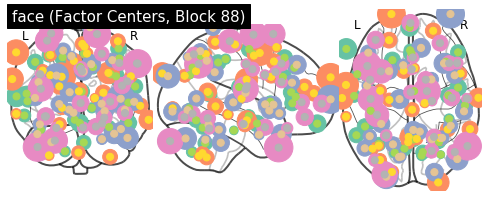

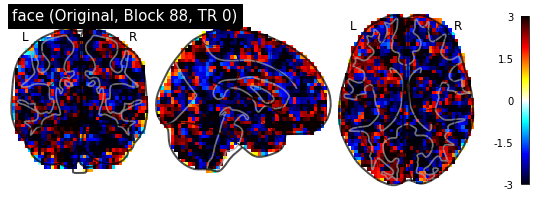

10/05/2020 18:00:03 Reconstruction Error (Frobenius Norm): 1.46620789e+02 out of 6.69425842e+02


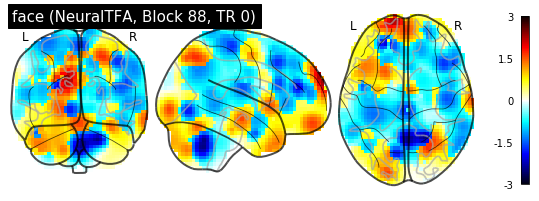

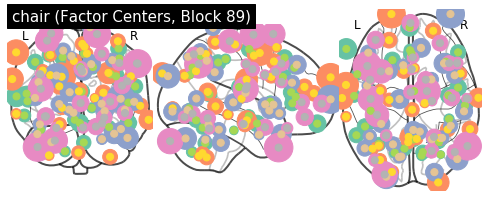

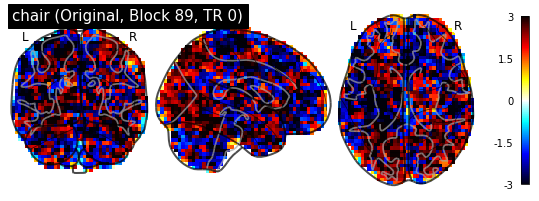

10/05/2020 18:00:06 Reconstruction Error (Frobenius Norm): 1.35041809e+02 out of 6.74605530e+02


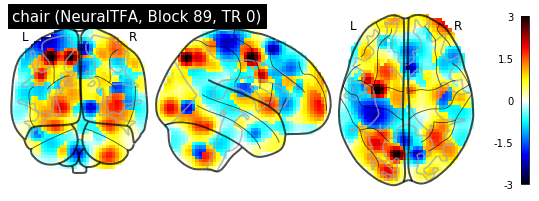

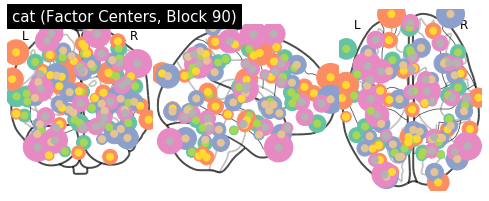

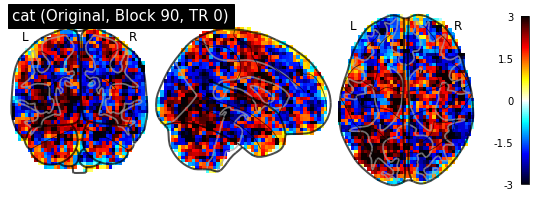

10/05/2020 18:00:08 Reconstruction Error (Frobenius Norm): 1.47498367e+02 out of 6.98438171e+02


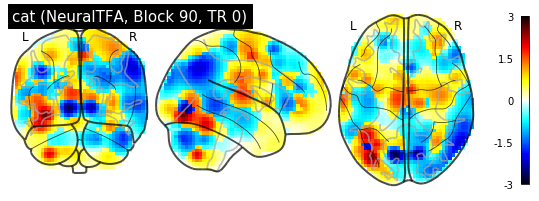

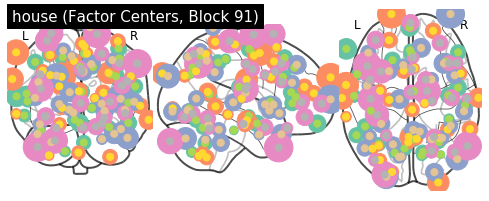

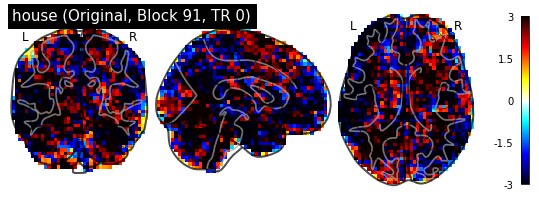

10/05/2020 18:00:11 Reconstruction Error (Frobenius Norm): 1.65016968e+02 out of 7.28632324e+02


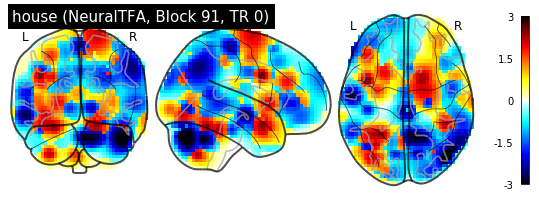

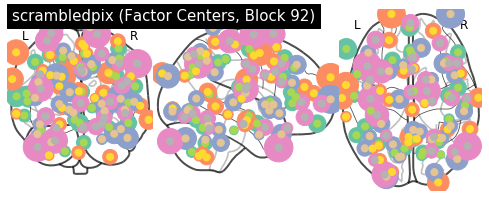

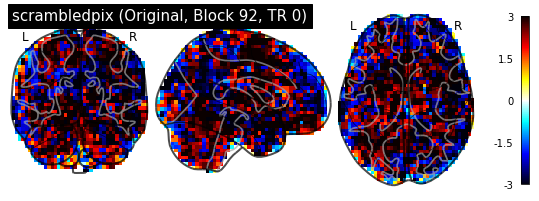

10/05/2020 18:00:14 Reconstruction Error (Frobenius Norm): 1.29433823e+02 out of 6.72555176e+02


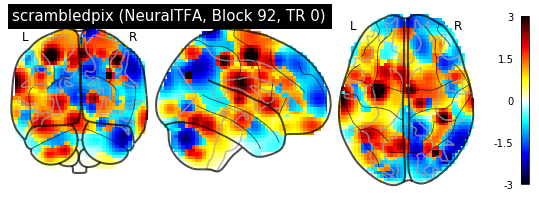

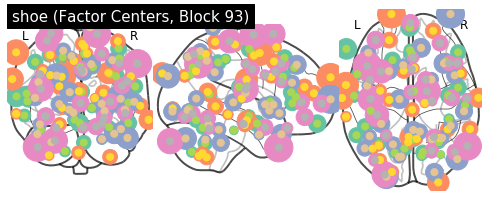

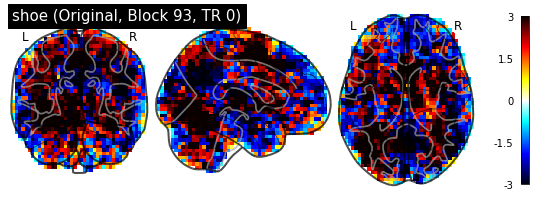

10/05/2020 18:00:17 Reconstruction Error (Frobenius Norm): 1.53040314e+02 out of 7.96064758e+02


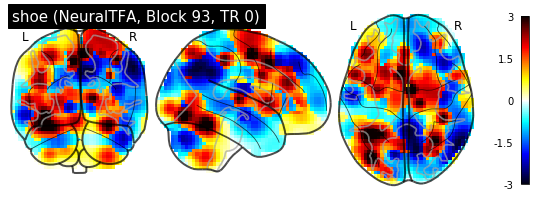

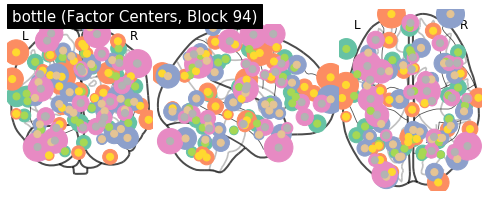

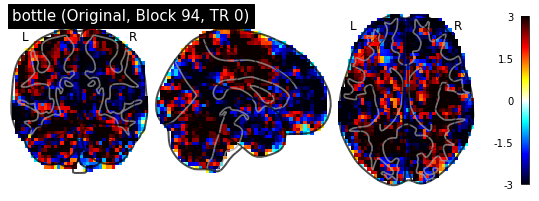

10/05/2020 18:00:20 Reconstruction Error (Frobenius Norm): 1.53328903e+02 out of 7.91174011e+02


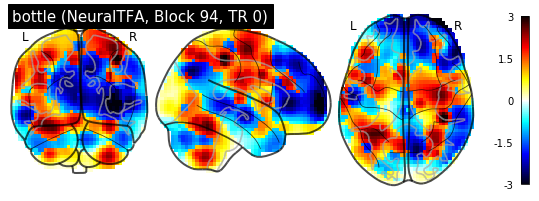

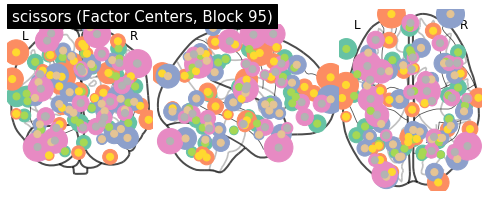

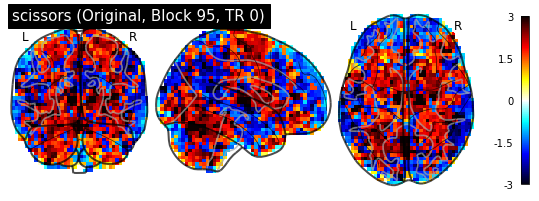

10/05/2020 18:00:23 Reconstruction Error (Frobenius Norm): 1.09610870e+02 out of 6.30872864e+02


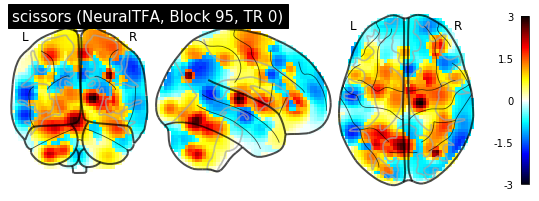

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

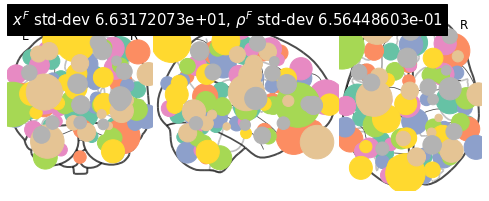

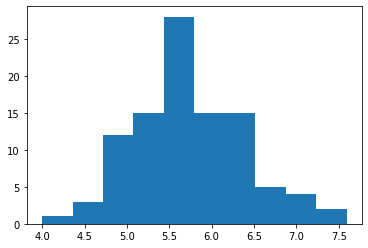

(<nilearn.plotting.displays.OrthoProjector at 0x7fbbb6495890>,
 tensor([[-3.2177e+01, -4.6525e+01, -2.0882e+01],
         [ 4.1785e+01, -1.6329e+01,  5.8260e+01],
         [ 3.6631e+01, -6.2148e+01, -2.1404e+01],
         [-2.9992e+01, -5.8435e+01,  4.6671e+01],
         [-2.0240e+01,  3.4700e+01,  2.7766e+01],
         [ 4.8137e+00,  4.4248e+01, -9.6394e+00],
         [-7.5318e+00, -8.6343e+01, -9.3026e+00],
         [ 1.6422e+01, -7.6126e+01,  3.4300e+01],
         [-5.2249e+01, -3.5487e+01,  5.0740e+01],
         [ 6.0317e+01, -4.1186e+01,  1.6580e+01],
         [-5.5129e+01, -1.3665e+01, -4.3783e-01],
         [ 1.2245e+01, -8.1100e+01, -3.2421e+01],
         [-2.6965e+01, -7.2361e+01, -4.2467e+01],
         [ 4.4495e+01,  3.5564e+01, -3.2306e+01],
         [-1.1696e+00,  3.9127e+00,  5.4050e+01],
         [-1.3790e+00,  2.1072e+01,  5.6045e+01],
         [ 3.2009e+01, -7.6814e+01,  3.1371e+01],
         [ 4.2410e+01,  2.1018e+01,  2.5742e+01],
         [-1.8236e-01, -5.6882e+01, -

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

10/05/2020 18:00:33 Average reconstruction error (MSE): 5.22444876e+02 +/- 4.16346248e+01
10/05/2020 18:00:33 Average data norm (Euclidean): 6.04845184e+02 +/- 6.25058287e+01
10/05/2020 18:00:33 Percent average reconstruction error: 86.656453 +/- 4.01809618e+00


(array([556.91375732, 533.07800293, 498.83905029, 505.78771973,
        525.2456665 , 508.15222168, 511.08230591, 486.37460327,
        555.19348145, 528.22338867, 498.49777222, 448.60855103,
        469.49969482, 487.7142334 , 547.34295654, 539.81555176,
        498.91162109, 495.7416687 , 469.11538696, 498.5836792 ,
        478.59176636, 531.41314697, 498.59866333, 509.16064453,
        611.79577637, 546.6206665 , 506.70031738, 530.77972412,
        474.51190186, 511.08349609, 513.21508789, 475.35931396,
        584.29870605, 522.63464355, 464.86755371, 492.20059204,
        530.18493652, 488.52017212, 504.09277344, 538.41436768,
        592.86297607, 499.42926025, 495.71722412, 519.60559082,
        525.08172607, 507.89111328, 542.29815674, 489.59823608,
        522.46673584, 535.16125488, 484.42541504, 455.29901123,
        506.54589844, 552.02423096, 517.46374512, 548.10766602,
        454.31521606, 450.77529907, 467.60147095, 448.08377075,
        465.96029663, 465.58731079, 431.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[597624832.0, -597479936.0, 144922.390625],
 [597788288.0, -597338944.0, 145328.96875]]